# Portfolio Allocation with "Sequential Solvers"

In [1]:
"""Example implementations of SequentialPortfolioConsumerType
"""
from time import time

import matplotlib.pyplot as plt
import numpy as np

from HARK.ConsumptionSaving.ConsPortfolioModel import init_portfolio
from HARK.ConsumptionSaving.ConsSequentialPortfolioModel import (
    SequentialPortfolioConsumerType,
)
from HARK.utilities import plot_funcs

## SequentialPortfolioConsumerType Example Implementation

In [2]:
# Make and solve an example portfolio choice consumer type
print("Now solving an example portfolio choice problem; this might take a moment...")
MyType = SequentialPortfolioConsumerType()
MyType.cycles = 0
t0 = time()
MyType.solve()
t1 = time()
MyType.cFunc = [MyType.solution[t].cFuncAdj for t in range(MyType.T_cycle)]
MyType.ShareFunc = [MyType.solution[t].ShareFuncAdj for t in range(MyType.T_cycle)]
MyType.SequentialShareFunc = [
    MyType.solution[t].SequentialShareFuncAdj for t in range(MyType.T_cycle)
]
print(
    "Solving an infinite horizon portfolio choice problem took "
    + str(t1 - t0)
    + " seconds.",
)

Now solving an example portfolio choice problem; this might take a moment...
Solving an infinite horizon portfolio choice problem took 10.279305696487427 seconds.


Consumption function over market resources:


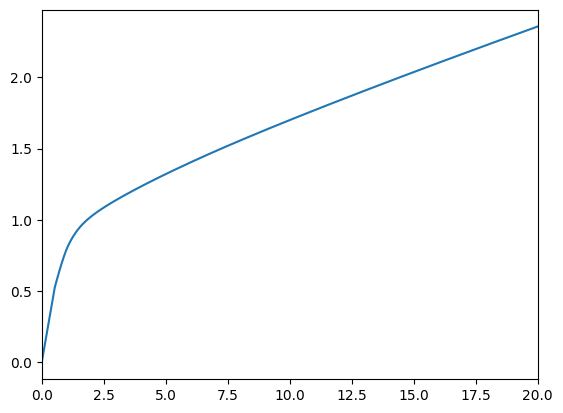

In [3]:
# Plot the consumption and risky-share functions
print("Consumption function over market resources:")
plot_funcs(MyType.cFunc[0], 0.0, 20.0)

Risky asset share as a function of liquid assets:
Optimal (blue/orange) versus Theoretical Limit (green)


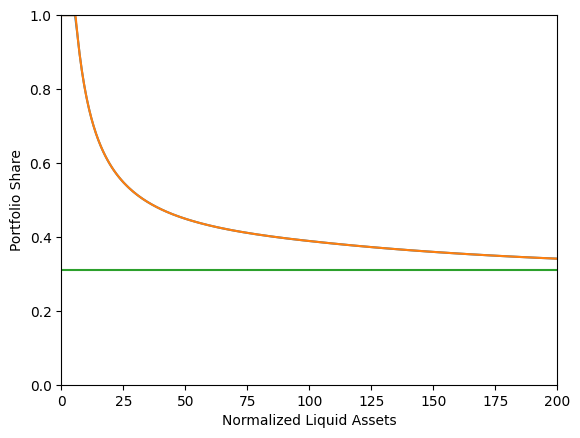

In [4]:
# Since we are using a discretization of the lognormal distribution,
# the limit is numerically computed and slightly different from
# the analytical limit obtained by Merton and Samuelson for infinite wealth
print("Risky asset share as a function of liquid assets:")
print("Optimal (blue/orange) versus Theoretical Limit (green)")
plt.xlabel("Normalized Liquid Assets")
plt.ylabel("Portfolio Share")
plt.ylim(0.0, 1.0)
plt.xlim(0.0, 200.0)
mgrid = np.linspace(0.0, 300.0, 300)
cgrid = MyType.cFunc[0](mgrid)
shares = MyType.ShareFunc[0](mgrid)
agrid = mgrid - cgrid
plt.plot(agrid, shares)
plot_funcs(
    [
        MyType.SequentialShareFunc[0],
        lambda a: MyType.ShareLimit[0] * np.ones_like(a),
    ],
    0.0,
    200.0,
)

# Note that the orange line lies right on top of the blue line and they are basically
# indistinguishable. This is expected, as deciding saving and risky share simultaneously
# should give the same result as when doing it sequentially.

In [5]:
print("\n\n\n")
print("For derivation of the numerical limiting portfolio share")
print("as market resources approach infinity, see")
print(
    "https://www.econ2.jhu.edu/people/ccarroll/public/lecturenotes/AssetPricing/Portfolio-CRRA/",
)





For derivation of the numerical limiting portfolio share
as market resources approach infinity, see
https://www.econ2.jhu.edu/people/ccarroll/public/lecturenotes/AssetPricing/Portfolio-CRRA/


In [6]:
print("\n\n\n")

In [7]:
""
# Make another example type, but this one can only update their risky portfolio
# share in any particular period with 15% probability.
init_sticky_share = init_portfolio.copy()
init_sticky_share["AdjustPrb"] = 0.15

In [8]:
# Make and solve a discrete portfolio choice consumer type
print(
    'Now solving a portfolio choice problem with "sticky" portfolio shares; this might take a moment...',
)
StickyType = SequentialPortfolioConsumerType(**init_sticky_share)
StickyType.cycles = 0
t0 = time()
StickyType.solve()
t1 = time()
StickyType.cFuncAdj = [
    StickyType.solution[t].cFuncAdj for t in range(StickyType.T_cycle)
]
StickyType.cFuncFxd = [
    StickyType.solution[t].cFuncFxd for t in range(StickyType.T_cycle)
]
StickyType.ShareFunc = [
    StickyType.solution[t].ShareFuncAdj for t in range(StickyType.T_cycle)
]
StickyType.SequentialShareFunc = [
    StickyType.solution[t].SequentialShareFuncAdj for t in range(StickyType.T_cycle)
]
print(
    "Solving an infinite horizon sticky portfolio choice problem took "
    + str(t1 - t0)
    + " seconds.",
)

Now solving a portfolio choice problem with "sticky" portfolio shares; this might take a moment...
Solving an infinite horizon sticky portfolio choice problem took 26.704002380371094 seconds.


Consumption function over market resources when the agent can adjust his portfolio:


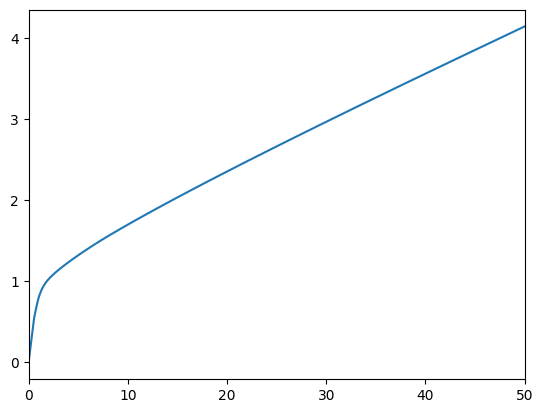

In [9]:
# Plot the consumption and risky-share functions
print(
    "Consumption function over market resources when the agent can adjust his portfolio:",
)
plot_funcs(StickyType.cFuncAdj[0], 0.0, 50.0)

Consumption function over market resources when the agent CAN'T adjust, by current share:


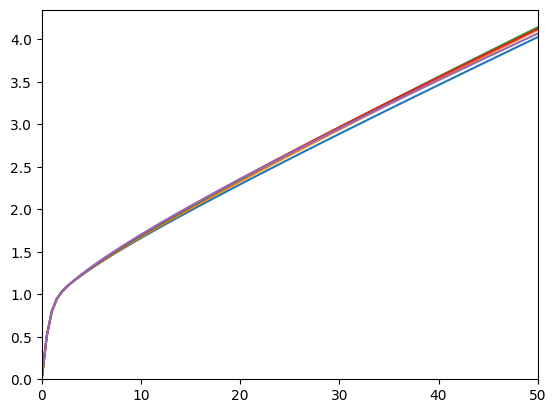

In [10]:
print(
    "Consumption function over market resources when the agent CAN'T adjust, by current share:",
)
M = np.linspace(0.0, 50.0, 100)
for s in np.linspace(0.0, 1.0, 5):
    C = StickyType.cFuncFxd[0](M, s * np.ones_like(M))
    plt.plot(M, C)
plt.xlim(0.0, 50.0)
plt.ylim(0.0, None)
plt.show()

Risky asset share function over market resources (when possible to adjust):
Optimal (blue/orange) versus Theoretical Limit (green)


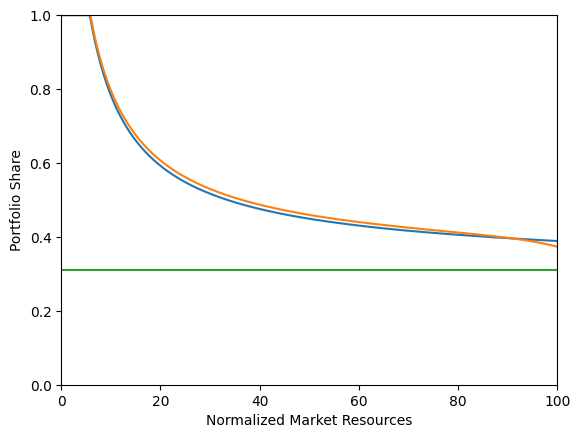

In [12]:
print("Risky asset share function over market resources (when possible to adjust):")
print("Optimal (blue/orange) versus Theoretical Limit (green)")
plt.xlabel("Normalized Market Resources")
plt.ylabel("Portfolio Share")
plt.ylim(0.0, 1.0)
mgrid = np.linspace(0.0, 200.0, 1000)
cgrid = MyType.cFunc[0](mgrid)
shares = MyType.ShareFunc[0](mgrid)
agrid = mgrid - cgrid
plt.plot(agrid, shares)
plot_funcs(
    [
        StickyType.SequentialShareFunc[0],
        lambda a: StickyType.ShareLimit[0] * np.ones_like(a),
    ],
    0.0,
    100.0,
)